input mean -0.00259 and std 0.99949
layer 1 mean 0.39643 and std 0.58006
layer 2 mean 0.39109 and std 0.57301
layer 3 mean 0.38987 and std 0.57182
layer 4 mean 0.38890 and std 0.57114
layer 5 mean 0.38804 and std 0.57028
layer 6 mean 0.38659 and std 0.56862
layer 7 mean 0.38538 and std 0.56794
layer 8 mean 0.38359 and std 0.56580
layer 9 mean 0.38160 and std 0.56419


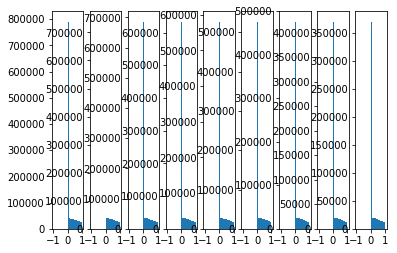

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

g = tf.Graph()
with g.as_default():
    data = tf.constant(np.random.randn(2000, 800).astype('float32'))
    layer_sizes = [800 - 50 * i for i in range(0,10)]
    num_layers = len(layer_sizes)
  
    fcs = []
    for i in range(0, num_layers - 1):
        X = data if i == 0 else fcs[i - 1]
        node_in = layer_sizes[i]
        node_out = layer_sizes[i + 1]
        W = tf.Variable(np.random.randn(node_in, node_out).astype('float32')) * 0.01 #/ np.sqrt(node_in)
        fc = tf.matmul(X, W)
        fc = tf.contrib.layers.batch_norm(fc, center=True, scale=True,
                                          is_training=True)
        fc = tf.nn.relu(fc)
        fcs.append(fc)
    
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
  
    print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                          np.std(data.eval())))
    for idx, fc in enumerate(fcs):
        print('layer {0} mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                               np.std(fc.eval())))
  
    plt.figure()
    for idx, fc in enumerate(fcs):
        plt.subplot(1, len(fcs), idx+1)
        plt.hist(fc.eval().flatten(), 30, range=[-1,1])